In [52]:
# importa las librerías a nuestro entorno de trabajo

import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns # Importar seaborn para mejores visualizaciones
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#Importar el drive para usar el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
# Ruta del archivo en Google Drive
url = '/content/drive/MyDrive/Colab Notebooks/data.csv'

# Cargar el archivo CSV con separador ','
df = pd.read_csv(url, sep=',',encoding='latin-1')

In [53]:
df.head(5) #Realizar una consulta del ejemplo

,Codigo de stock,Descripcion,Cantidad,Fecha de ingreso,Precio Unitario,Codigo de cliente,Pais
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Eliminar columnas que sean irrelevantes
df = df.drop(['InvoiceNo',], axis=1)
df.head(5)

In [55]:
df.dtypes #Verificar el tipo de data


,0
Codigo de stock,object
Descripcion,object
Cantidad,int64
Fecha de ingreso,object
Precio Unitario,float64
Codigo de cliente,float64
Pais,object


In [56]:
#Cambiarle el nombre a las columnas para facilitar el etendimiento de la mismas
df = df.rename(columns={"StockCode":"Codigo de stock","Description":"Descripcion","Quantity":"Cantidad","UnitPrice":"Precio Unitario","Country":"Pais","InvoiceDate":"Fecha de ingreso","CustomerID":"Codigo de cliente"})
df.head(5)

,Codigo de stock,Descripcion,Cantidad,Fecha de ingreso,Precio Unitario,Codigo de cliente,Pais
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [57]:
#Verificar filas duplicadas
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.count()

number of duplicate rows:  (5848, 7)


,0
Codigo de stock,541909
Descripcion,540455
Cantidad,541909
Fecha de ingreso,541909
Precio Unitario,541909
Codigo de cliente,406829
Pais,541909


In [58]:
#Eliminar filas duplicadas
df = df.drop_duplicates()
df.count()

,0
Codigo de stock,536061
Descripcion,534608
Cantidad,536061
Fecha de ingreso,536061
Precio Unitario,536061
Codigo de cliente,401564
Pais,536061


In [59]:
#Verificar filas con valores nulos
print(df.isnull().sum())

Codigo de stock           0
Descripcion            1453
Cantidad                  0
Fecha de ingreso          0
Precio Unitario           0
Codigo de cliente    134497
Pais                      0
dtype: int64


In [60]:
#Eliminar las filas con valores nulos
df = df.dropna()
df.count()

,0
Codigo de stock,401564
Descripcion,401564
Cantidad,401564
Fecha de ingreso,401564
Precio Unitario,401564
Codigo de cliente,401564
Pais,401564


In [61]:
# Calcular el ingreso total
df['Ingreso'] = df['Cantidad'] * df['Precio Unitario']

# Calcular el ticket promedio
ticket_promedio = df['Ingreso'].sum() / len(df)

print(f"El ticket promedio es: {ticket_promedio}")

El ticket promedio es: 20.612085704893868


In [62]:
productos_mas_vendidos = df.groupby('Codigo de stock')['Cantidad'].sum().sort_values(ascending=False)

print("Los productos más vendidos son:")
print(productos_mas_vendidos.head(10)) # Muestra los 10 productos más vendidos

Los productos más vendidos son:
Codigo de stock
84077     53119
22197     48685
85099B    44963
84879     35215
85123A    34185
21212     33386
23084     27045
22492     25880
22616     25305
21977     24129
Name: Cantidad, dtype: int64


In [ ]:
for pais in df['Pais'].unique():
  productos_mas_vendidos_pais = df[df['Pais'] == pais].groupby('Codigo de stock')['Cantidad'].sum().sort_values(ascending=False)
  print(f"\nProductos más vendidos en {pais}:")
  print(productos_mas_vendidos_pais.head(5))

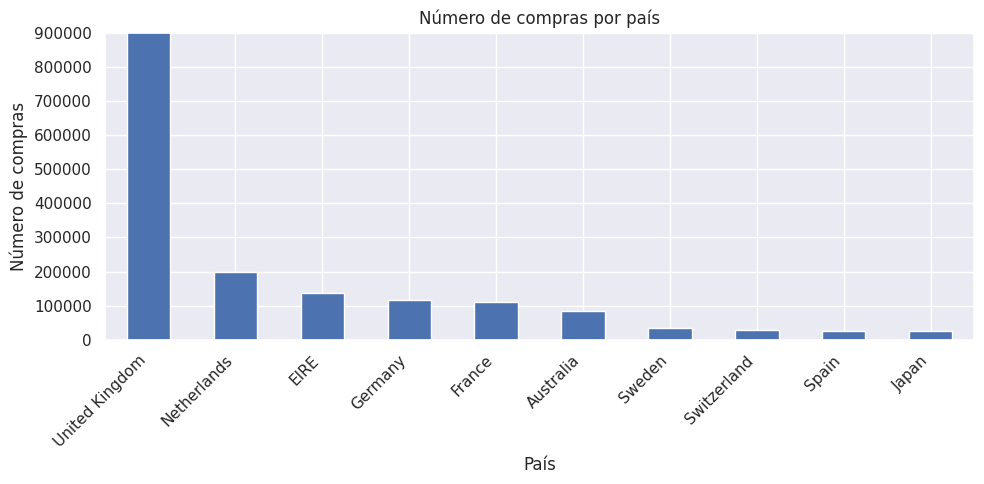

In [75]:
# Agrupamos los paises
compras_por_pais = df.groupby('Pais')['Cantidad'].sum().sort_values(ascending=False)

# Seleccionamos los 10 países con más compras
top_10_paises = compras_por_pais.head(10)

#Creamos el siguiente grafico
top_10_paises.plot(kind='bar', figsize=(10, 5))
plt.ylim(bottom=0, top=900000)
plt.title("Número de compras por país")
plt.ylabel('Número de compras')
plt.xlabel('País')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

Aqui podemos ver que el pais que realiza mas compras por lejos es el Reino Unido, con paises bajos como segundo lugar llegando apenas a 200000

In [66]:
#
compras_por_fecha = df.groupby('Fecha de ingreso')['Ingreso'].sum()

print("Compras por fecha:")
print(compras_por_fecha)

Compras por fecha:
Fecha de ingreso
1/10/2011 10:32     326.78
1/10/2011 10:35     512.59
1/10/2011 10:44     102.00
1/10/2011 10:58     185.97
1/10/2011 11:09     332.41
                    ...   
9/9/2011 8:48       344.90
9/9/2011 9:03       205.67
9/9/2011 9:13      1087.70
9/9/2011 9:38       251.31
9/9/2011 9:52       985.62
Name: Ingreso, Length: 20460, dtype: float64
